In [2]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Get Data, EDA

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Basic Exploration
1. 891 rows, 12 columns ie 891 people, 12 variables about each person

2. Columns Looking at the Kaggle Site
    1. Survived" column, 1 = Yes, 0 = No
    2. pclass: ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
    3. sex: male or female
    4. age: in years
    5. sibsp: # of siblings or spouses aboard the Titanic
    6. parch: # of parents or children aboard the Titanic
    7. ticket: ticket number
    8. fare: passenger fare
    9. cabin: cabin number
    10. embarked: port of embarkation, C = Cherbourg, Q = Queenston, S = Southampton
    11. PassengerId
    12. Name


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


test data has 418 rows but 11 columns because 'Survived' is the class we are trying to predict

In [7]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### The gender submission is an example of what the submission file should look like. The reason why it is called gender is because this result was created by assuming that any female in the TEST set would survive 

## Exploring the training dataset

<AxesSubplot:ylabel='Frequency'>

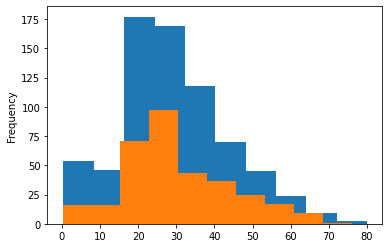

In [8]:
train.Age.plot.hist()
test.Age.plot.hist()

<AxesSubplot:>

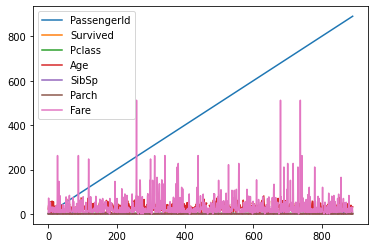

In [9]:
train.plot()

## Looking for missing values

<AxesSubplot:>

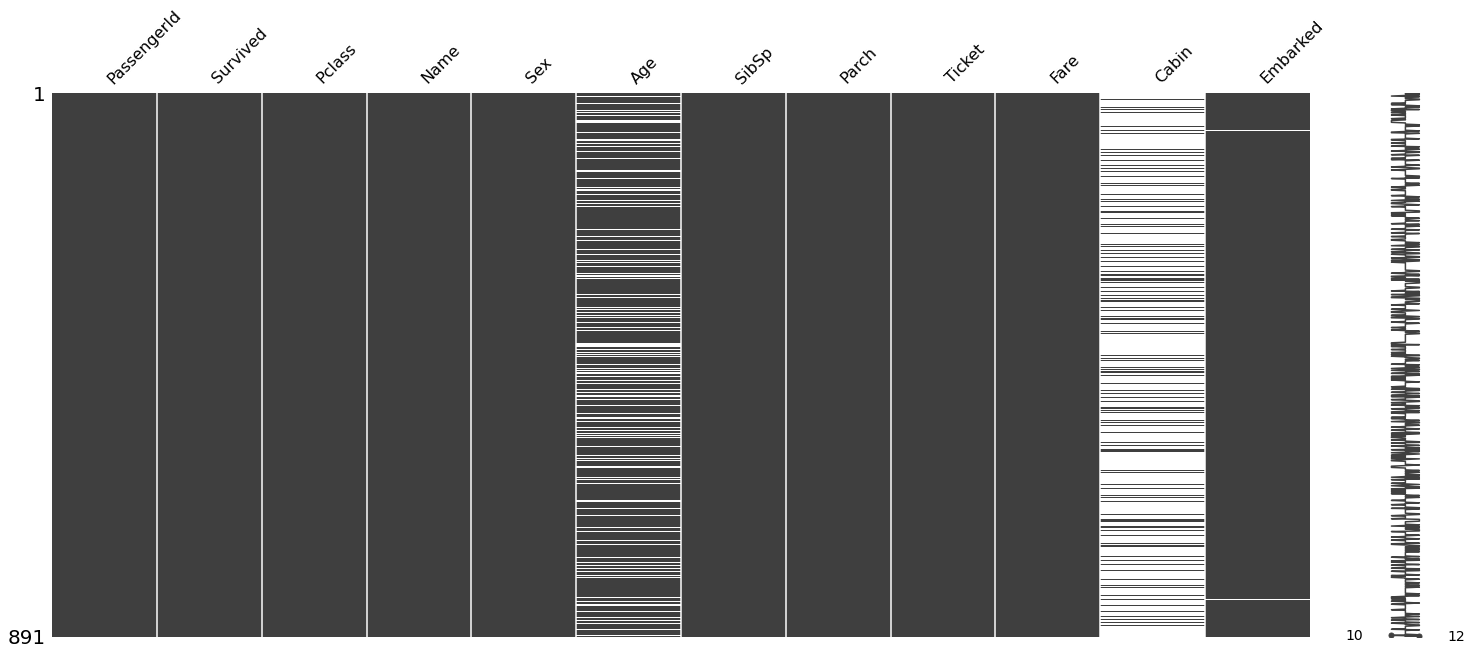

In [10]:
missingno.matrix(train)

In [11]:
train.isnull().sum() # get null counts of all columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# print(train.Age.describe()) 
print(train.Cabin.describe()) # get counts for specific column


count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object


1. We can see that Age and Cabin has a lot of missing data. We can double check using describe to see the count. There are 891 rows but there are only 714 counted. So 177 rows missing

2. Cabin might not even be worth it to check on seeing how there almost no data

## Creating 2 empty dataframes
1 for continuous values, the other for DISCRETIZED continuous values

In [13]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

## Looking at the datatypes in the df

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Looking through each column/feature

### Target Feature: Survived

0    549
1    342
Name: Survived, dtype: int64


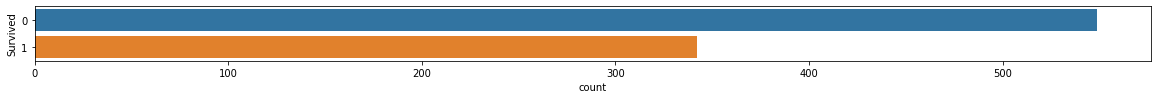

In [15]:
fig = plt.figure(figsize = (20,1))
sns.countplot(y='Survived', data= train)
print(train.Survived.value_counts())

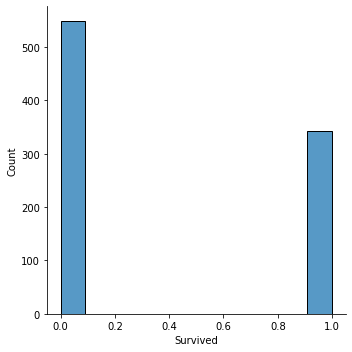

In [16]:
sns.displot(train, x = 'Survived')

### this is not a good way to plot the Survived variabel
1. It should be categorical: 1 = Survived, 0 = died
2. Its not clear to people

convert Survived to boolean would be better

no     549
yes    342
Name: s2, dtype: int64


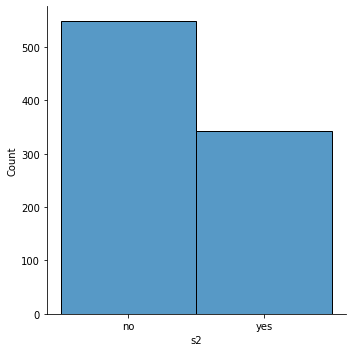

In [17]:
# train['s2'] = train['Survived'].apply(lambda x: 'yes' if x==1 else 'no')
train['s2'] = train['Survived'].map({True:'yes', False:'no'})

print(train['s2'].value_counts())
sns.displot(train, x = 's2')

In [18]:
# add to our dfs
# df_bin['Survived'] = train['s2']
# df_con['Survived'] = train['s2']

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

## Feature exploration: CPNS
1. Plot: is it discrete or continuous?
2. Check null values
3. Check the counts
4. Summary stats if needed

## Feature: Pclass
ticket class of passenger

1 = 1st, 2 = 2nd, 3 = 3rd

plot first

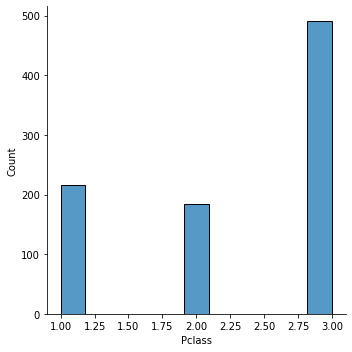

In [19]:
sns.displot(train.Pclass)

In [20]:
train.Pclass.isnull().sum() # no null vals

0

In [21]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

no missing vals so lets add it to our sub dataframes

In [22]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

## Feature: Name
name of passenger
1. doesnt make sense to plot names

In [23]:
# sns.displot(train.Name) # does not make sense to plot

In [24]:
train.Name.isnull().sum()

0

In [25]:
print(train.Name.value_counts())
print(train.Name.describe()) # 891 unique values

Risien, Mr. Samuel Beard           1
Lundahl, Mr. Johan Svensson        1
Lefebre, Miss. Ida                 1
Homer, Mr. Harry ("Mr E Haven")    1
Moor, Master. Meier                1
                                  ..
Anderson, Mr. Harry                1
Heininen, Miss. Wendla Maria       1
Pasic, Mr. Jakob                   1
Cavendish, Mr. Tyrell William      1
Abbing, Mr. Anthony                1
Name: Name, Length: 891, dtype: int64
count                          891
unique                         891
top       Risien, Mr. Samuel Beard
freq                             1
Name: Name, dtype: object


- Every passenger has a unique name
- We can reduce the differences by removing Miss, Mrs or Mr since we already have Sex
- too many values, so we wont include this in our dataframes

## Feature: Sex
- Male of Female

<AxesSubplot:xlabel='Sex', ylabel='count'>

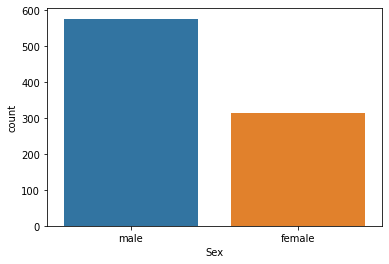

In [26]:
sns.countplot(x='Sex', data=train)

In [27]:
train.Sex.isnull().sum()

0

In [28]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [30]:
# add to df
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male, 1 for female

df_con['Sex'] = train['Sex']

## It seems like dbourke likes to change the discrete variables to int. Might be because later when we are training the model, numbers are more easier to process.

In [31]:
df_bin['Sex']
df_con['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

C:\Users\Raihan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raihan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


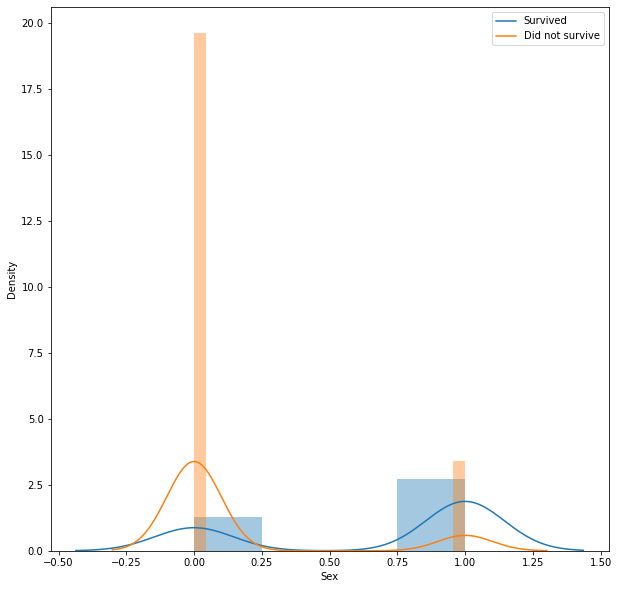

In [32]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

plt.legend() # legend to see the legend
plt.show()

1. Not many ppl survived
2. Of those that did, more were female (because sex == 1 means female)

## Feature: Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

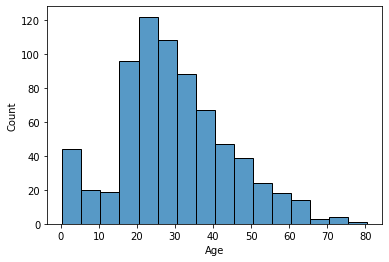

In [39]:
sns.histplot(data=train, x='Age', binwidth=5)

In [34]:
train.Age.isnull().sum()

177

In [37]:
# train.Age.value_counts() # not useful because numeric
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

1. 177/891 rows missing almost 25%
2. what to do?
    a. remove the rows
    b. replace with the mean (30)
    

In [43]:
train['Age'] = train['Age'].fillna(value= 30)
train.Age.isnull().sum()

0

In [51]:
train['Age'] = train['Age'].astype(int)
train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [52]:

# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

#### function to create count and distribution visualisations
- since we've been repeating ourselves alot

In [73]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()


## Feature: SibSp
- number of sibling or spouses the passenger has on the titanic

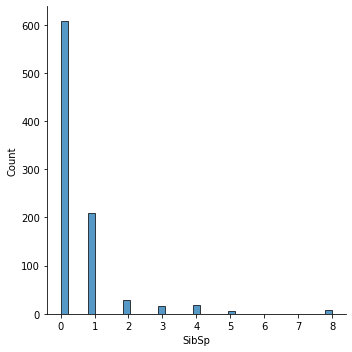

In [56]:
sns.displot(data = train, x = 'SibSp')

In [70]:
def cns(data, target_column):
    """
    function that
    1. COUNTS: get the value_counts of the target col
    2. NULLS: checks the amount of nulls in the col
    3. Stats: Check the stats of the columns
    """
    print('----------------------------')
    print(data[target_column].value_counts())

    print('----------------------------')
    print('NUMBER OF NULLS: ' + str(train[target_column].isnull().sum()))

    print('----------------------------')
    print(train[target_column].describe())


In [71]:
cns(train, 'SibSp')

----------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------
NUMBER OF NULLS: 0
----------------------------
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


C:\Users\Raihan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Raihan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


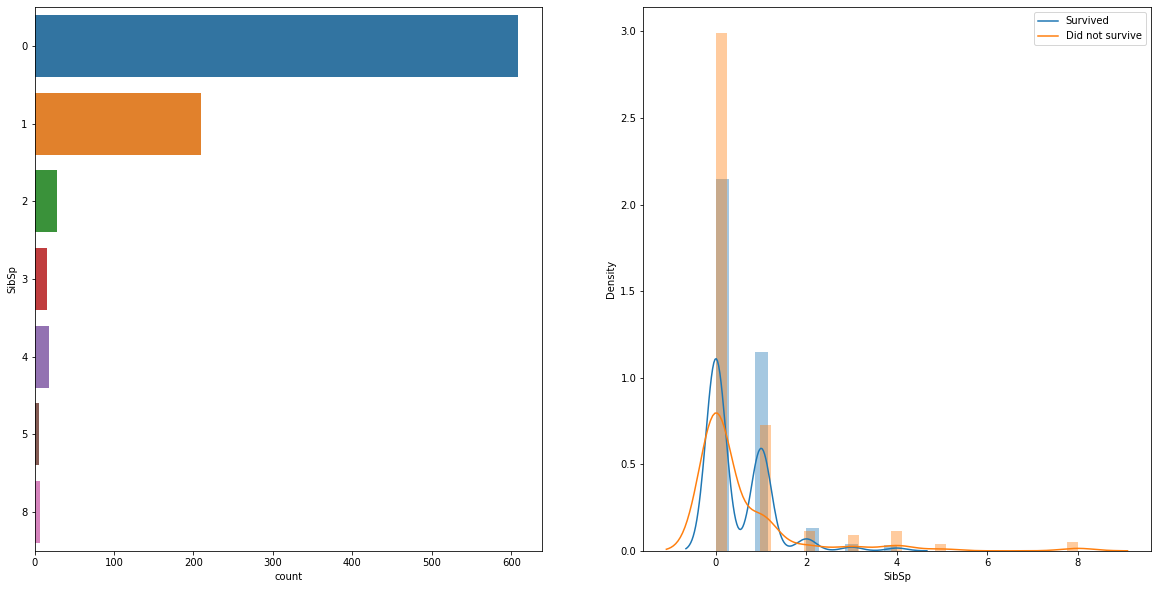

In [75]:
plot_count_dist(train,
                bin_df = df_bin,
                label_column = 'Survived',
                target_column = 'SibSp',
                figsize = (20,10)
)